<a href="https://colab.research.google.com/github/vitoraugusto1993/ml-projects/blob/main/GAN/GAN/Data%20Balancing/GAN_Synthetic_Fraudulent_Credit_Card_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Balancing with GAN: Credit Card Fraud Detection

### Task 1 - Importing the Dataset

Importing the modules

In [ ]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


Importing the data

In [ ]:
dataset = pd.read_csv('Creditcard_dataset.csv', delimiter=',')
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
1,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50492 entries, 0 to 50491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50492 non-null  int64  
 1   V1      50492 non-null  float64
 2   V2      50492 non-null  float64
 3   V3      50492 non-null  float64
 4   V4      50492 non-null  float64
 5   V5      50492 non-null  float64
 6   V6      50492 non-null  float64
 7   V7      50492 non-null  float64
 8   V8      50492 non-null  float64
 9   V9      50492 non-null  float64
 10  V10     50492 non-null  float64
 11  V11     50492 non-null  float64
 12  V12     50492 non-null  float64
 13  V13     50492 non-null  float64
 14  V14     50492 non-null  float64
 15  V15     50492 non-null  float64
 16  V16     50492 non-null  float64
 17  V17     50492 non-null  float64
 18  V18     50492 non-null  float64
 19  V19     50492 non-null  float64
 20  V20     50492 non-null  float64
 21  V21     50492 non-null  float64
 22

In [ ]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,...,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,5.049200e+04,50492.000000
mean,-0.040731,0.018318,-0.049361,0.040582,-0.019978,-0.018333,-0.042518,0.008656,-0.022848,-0.050028,...,0.003165,0.002081,0.002660,-0.002265,0.002650,-0.002041,0.001475,-0.000442,6.051124e-17,0.009744
std,2.094812,1.739607,1.741439,1.488873,1.472645,1.340378,1.457410,1.315615,1.140424,1.264408,...,0.771712,0.729185,0.660042,0.602914,0.522141,0.480269,0.417714,0.311240,1.000010e+00,0.098231
min,-40.470142,-44.639245,-31.103685,-5.600607,-40.427726,-23.496714,-43.557242,-50.943369,-13.434066,-24.588262,...,-22.797604,-8.887017,-36.666000,-2.754889,-6.712624,-1.726928,-9.544855,-8.464609,-3.724968e-01,0.000000
25%,-0.937843,-0.594031,-0.919580,-0.839113,-0.700148,-0.783973,-0.564349,-0.207474,-0.654708,-0.548915,...,-0.227258,-0.538949,-0.161747,-0.355523,-0.315661,-0.327364,-0.071062,-0.052905,-3.480382e-01,0.000000
50%,0.007369,0.067945,0.177130,0.001517,-0.058350,-0.283145,0.037798,0.026876,-0.055538,-0.102703,...,-0.028884,0.008675,-0.011499,0.040341,0.021271,-0.053076,0.001815,0.011306,-2.791478e-01,0.000000
75%,1.305251,0.815196,1.017796,0.774336,0.610230,0.402372,0.568175,0.335848,0.582596,0.441100,...,0.186622,0.529787,0.147550,0.435230,0.353642,0.240535,0.092566,0.078959,-4.299306e-02,0.000000
max,2.420346,22.057729,3.906558,12.114672,34.099309,23.917837,44.054461,20.007208,10.392889,12.901627,...,27.202839,8.361985,20.803344,3.948061,5.826159,3.122747,9.879903,15.942151,4.278741e+01,1.000000


Check the data shape

In [ ]:
dataset.shape

(50492, 31)

Let's see how many genuine and limited fraudulent records we have

In [ ]:
dataset['Class'].value_counts()

0    50000
1      492
Name: Class, dtype: int64

### Task 2 - Data Preprocessing and Exploration

*   Removing all the rows with `Nan` values
*   Removing `Time` column
*   Feature Scaling `Amount` column
*   Split the data into features and labels
*   Data Exploration


Removing the rows `Nan` values in the dataset

In [ ]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50492 entries, 0 to 50491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50492 non-null  int64  
 1   V1      50492 non-null  float64
 2   V2      50492 non-null  float64
 3   V3      50492 non-null  float64
 4   V4      50492 non-null  float64
 5   V5      50492 non-null  float64
 6   V6      50492 non-null  float64
 7   V7      50492 non-null  float64
 8   V8      50492 non-null  float64
 9   V9      50492 non-null  float64
 10  V10     50492 non-null  float64
 11  V11     50492 non-null  float64
 12  V12     50492 non-null  float64
 13  V13     50492 non-null  float64
 14  V14     50492 non-null  float64
 15  V15     50492 non-null  float64
 16  V16     50492 non-null  float64
 17  V17     50492 non-null  float64
 18  V18     50492 non-null  float64
 19  V19     50492 non-null  float64
 20  V20     50492 non-null  float64
 21  V21     50492 non-null  float64
 22

Removing Time column

In [ ]:
dataset = dataset.drop(columns=['Time'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50492 entries, 0 to 50491
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      50492 non-null  float64
 1   V2      50492 non-null  float64
 2   V3      50492 non-null  float64
 3   V4      50492 non-null  float64
 4   V5      50492 non-null  float64
 5   V6      50492 non-null  float64
 6   V7      50492 non-null  float64
 7   V8      50492 non-null  float64
 8   V9      50492 non-null  float64
 9   V10     50492 non-null  float64
 10  V11     50492 non-null  float64
 11  V12     50492 non-null  float64
 12  V13     50492 non-null  float64
 13  V14     50492 non-null  float64
 14  V15     50492 non-null  float64
 15  V16     50492 non-null  float64
 16  V17     50492 non-null  float64
 17  V18     50492 non-null  float64
 18  V19     50492 non-null  float64
 19  V20     50492 non-null  float64
 20  V21     50492 non-null  float64
 21  V22     50492 non-null  float64
 22

Feature Scaling of Amount column

In [ ]:
dataset.Amount.describe()

count    50492.000000
mean        88.027512
std        236.319832
min          0.000000
25%          5.780000
50%         22.060000
75%         77.867500
max      10199.440000
Name: Amount, dtype: float64

In [ ]:
scale = StandardScaler()
dataset["Amount"] = scale.fit_transform(dataset[["Amount"]])
dataset.Amount.describe()

count    5.049200e+04
mean     6.051124e-17
std      1.000010e+00
min     -3.724968e-01
25%     -3.480382e-01
50%     -2.791478e-01
75%     -4.299306e-02
max      4.278741e+01
Name: Amount, dtype: float64

Let's split the genuine and fraud records into separate dataframes

In [ ]:
data_genuine = dataset[dataset["Class"]==0]
data_fraud = dataset[dataset["Class"]==1]

Split the data into features and labels

In [ ]:
X = dataset.drop(columns=['Class'])
y = dataset['Class']

Data Exploration
  - Apply PCA to reduce the dimensionality of features `X` into two dimensions
  - Use a scatter plot to visualize our data

In [ ]:
corr = dataset.corr()
corr


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.050570,0.160863,-0.085069,0.097078,0.039687,0.181848,-0.017524,0.073687,0.158591,...,0.008758,-0.004522,-0.020901,-0.004281,-0.010228,0.002311,-0.002779,0.060241,-0.210527,-0.224042
V2,-0.050570,1.000000,-0.130109,0.072307,-0.111500,-0.004335,-0.123215,0.000777,-0.079429,-0.135465,...,0.017671,0.005517,-0.023880,-0.002580,-0.010842,-0.002938,-0.041825,0.061910,-0.501464,0.205594
V3,0.160863,-0.130109,1.000000,-0.141942,0.160680,0.055499,0.259130,-0.042340,0.126050,0.247827,...,-0.009828,-0.007746,-0.012882,0.000584,-0.008056,-0.004346,0.007067,0.030726,-0.173663,-0.397826
V4,-0.085069,0.072307,-0.141942,1.000000,-0.071292,-0.040718,-0.145797,0.018690,-0.075915,-0.151599,...,0.006571,0.005943,0.014228,-0.000869,-0.000599,0.010080,0.015933,-0.018584,0.082869,0.299914
V5,0.097078,-0.111500,0.160680,-0.071292,1.000000,0.025726,0.189149,-0.033608,0.084749,0.161632,...,-0.012086,-0.010326,-0.013464,0.001800,-0.003284,0.001734,0.045249,0.022779,-0.343906,-0.210922
V6,0.039687,-0.004335,0.055499,-0.040718,0.025726,1.000000,0.032948,-0.034589,0.018345,0.051616,...,-0.000294,0.003701,0.020796,-0.010972,0.001913,-0.004628,-0.036933,-0.006896,0.197592,-0.102086
V7,0.181848,-0.123215,0.259130,-0.145797,0.189149,0.032948,1.000000,0.009375,0.130570,0.261870,...,0.011061,-0.014355,0.026690,-0.001619,0.006102,-0.000396,0.006904,-0.013796,0.315148,-0.376138
V8,-0.017524,0.000777,-0.042340,0.018690,-0.033608,-0.034589,0.009375,1.000000,-0.017422,-0.016813,...,0.000937,-0.009107,-0.035486,0.004945,0.019421,0.009650,0.055806,0.016953,-0.088734,0.042373
V9,0.073687,-0.079429,0.126050,-0.075915,0.084749,0.018345,0.130570,-0.017422,1.000000,0.130375,...,0.000978,-0.004657,-0.007467,-0.000070,-0.001642,-0.004450,0.013089,-0.015584,-0.044857,-0.222527
V10,0.158591,-0.135465,0.247827,-0.151599,0.161632,0.051616,0.261870,-0.016813,0.130375,1.000000,...,-0.007203,-0.017118,-0.002238,0.004373,-0.006528,-0.004025,0.014022,-0.005075,-0.087856,-0.441449


<Axes: >

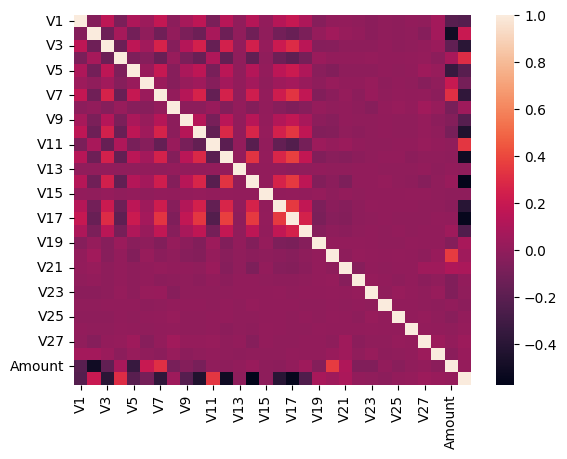

In [ ]:
sns.heatmap(corr, annot=False)

In [ ]:
pca = PCA(2)
ds_pca = pca.fit_transform(dataset)
ds_pca = pd.DataFrame(ds_pca)

In [ ]:
ds_pca.head()

,0,1
0,-0.448318,1.197350
1,-0.582577,0.258448
2,-0.938855,-0.729375
3,-0.630651,-0.499242
4,-0.535859,-1.055705


In [ ]:
ds_pca["Labels"] = y

Let's Use a scatter plot to visualize our data

In [ ]:
px.scatter(ds_pca, x=0, y=1, color='Labels')

### Task 3 - Building the Generator Model

Write a method to create the Generator model architecture

In [ ]:
def create_generator():
  model = Sequential(name='generator')
  model.add(Dense(32, activation='relu', input_dim=29, kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(29, activation='linear'))
  model.summary()
  return model

### Task 4 - Building the Discriminator Model

Write a method to create the Discriminator model architecture

In [ ]:
def create_discriminator():
  model = Sequential(name='discriminator')
  model.add(Dense(128, input_dim=29, kernel_initializer='he_uniform'))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  model.add(Dense(64))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  model.add(Dense(32))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  model.add(Dense(32))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  model.add(Dense(16))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy')
  return model

### Task 5 - Combine Generator and Discriminator models to Build The GAN

In [ ]:
def create_gan(generator, discriminator):
  discriminator.trainable = False
  gan_input = Input(shape=(generator.input_shape[1],))
  fake = generator(gan_input)
  gan_output = discriminator(fake)
  gan = Model(gan_input, gan_output)
  gan.summary()
  return gan

Let's create a method that generates synthetic data using the Generator

In [ ]:
def generate_synthetic_data(generator, num_samples):
  noise = np.random.normal(0, 1, (num_samples, generator.input_shape[1]))
  fake = generator.predict(noise)
  return fake

### Task 6 - Train and evaluate our GAN
*    Defining some variables
*    Creating our GAN
*    Training the GAN
*    Monitor the GAN performance using PCA




In [ ]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

In [ ]:
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan(generator, discriminator)
gan.compile(optimizer='adam', loss = 'binary_crossentropy')

epochs = 5000
batch_size = 32
half_batch = int(batch_size/2)

for epoch in range(epochs):
  fake = generate_synthetic_data(generator, half_batch)
  y_fake = np.zeros((half_batch, 1))

  real = data_fraud.drop('Class', axis=1).sample(half_batch)
  y_real = np.ones((half_batch, 1))

  discriminator.trainable = True
  discriminator.train_on_batch(real, y_real)
  discriminator.train_on_batch(fake, y_fake)
  discriminator.trainable = False

  noise = np.random.normal(0, 1, (batch_size, 29))
  gan.train_on_batch(noise, np.ones((batch_size, 1)))

  if epoch % 10 == 0:
    monitor_generator(generator)
    print("Epoch: {}".format(epoch))


### Task 7 - Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [ ]:
synthetic = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic)
df['Label'] = 'Fake'

df2 = data_fraud.drop('Class', axis=1)
df2['Label'] = 'Real'

df.columns = df2.columns
combined_df = pd.concat([df, df2])
combined_df

32/32 [==============================] - 0s 2ms/step


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Label
0,-3.587354,4.921143,-11.822358,9.662235,-4.561748,-3.942319,-9.961992,4.289793,-7.736490,-13.530274,...,1.780553,-1.240010,-0.029447,-0.399224,0.188143,0.389081,0.960633,1.054300,-1.589104,Fake
1,-1.333055,2.753436,-4.136590,4.997471,-1.257012,-1.960316,-3.830742,1.916917,-3.747588,-5.040807,...,0.801971,-0.180940,0.120037,-0.396935,0.600372,-0.088868,0.495763,1.017231,-0.274130,Fake
2,-0.570945,0.106822,0.434857,1.976788,-0.392826,0.779300,0.659903,-0.140497,0.232784,0.169576,...,-0.687680,0.223977,-0.105959,-0.186947,-0.375282,-0.193451,-0.418259,-0.093732,0.792609,Fake
3,-0.677430,2.250518,-2.282615,2.433753,-1.688126,-0.424964,-0.496678,-1.184983,-0.980734,-2.156525,...,1.380878,-0.727016,0.631710,-0.256827,0.457235,-0.382462,0.221707,0.183173,0.439271,Fake
4,-0.840421,0.454211,0.326496,2.836728,-1.197485,1.028567,0.745557,-0.125999,-0.653770,0.082399,...,-0.259740,0.182667,0.162411,-0.106711,0.027030,-0.197687,-0.055304,-0.172945,1.588213,Fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50487,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.277825,Real
50488,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.369281,Real
50489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042898,Real
50490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.664244,Real


Checking the individual feature distribution of `synthetic` and `real` fraud data.

In [ ]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'Label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

<ipython-input-43-70001e20521c>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>